# Task 4: Sales Prediction using Machine Learning

## 📌 Problem Statement

The objective of this project is to develop a **predictive model** that can estimate the **sales of a product** based on the company’s **advertising expenditures** across different media channels — **TV, Radio, and Newspaper**.

This task aims to understand how various marketing channels influence product sales and to build a machine learning model that can accurately forecast sales given a specific advertising budget.

As specified in the project brief, the primary requirement is to implement a **Simple Linear Regression** model to analyze the relationship between advertising spend and sales.  
In addition, this project explores advanced models such as **Multiple Linear Regression**, **Random Forest**, and **XGBoost Regressor** to compare performance and demonstrate how more complex algorithms can improve prediction accuracy.

### 🎯 Objectives
- To perform **exploratory data analysis (EDA)** to understand relationships between sales and different advertising channels.  
- To build and evaluate a **Simple Linear Regression** model as the baseline approach.  
- To extend the analysis using **Multiple Linear Regression**, **Random Forest**, and **XGBoost** for better accuracy.  
- To compare model performances using metrics such as **R² Score**, **RMSE**, and **MAE**.  
- To interpret results and provide actionable business insights about which marketing channels drive the highest sales.


### 🧠 Expected Outcome
By the end of this project, we will have:
- A trained machine learning model capable of predicting product sales for given TV, Radio, and Newspaper budgets.  
- A clear understanding of how each advertising channel affects sales.  
- A comparison of simple vs. advanced models to identify the most effective predictive approach for this dataset.


# Sales Prediction Using Machine Learning

This project predicts product sales based on advertising spend (TV, Radio, Newspaper).  
As required by the internship task, I first implemented **Simple Linear Regression**, 
and then compared its performance with advanced models like **Random Forest** and **XGBoost** 
to observe how model complexity affects prediction accuracy.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 3.0 MB/s eta 0:00:19
   - -------------------------------------- 1.8/56.8 MB 3.8 MB/s eta 0:00:15
   -- ------------------------------------- 2.9/56.8 MB 4.1 MB/s eta 0:00:14
   -- ------------------------------------- 2.9/56.8 MB 4.1 MB/s eta 0:00:14
   -- ------------------------------------- 3.1/56.8 MB 2.9 MB/s eta 0:00:19
   -- ------------------------------------- 3.9/56.8 MB 3.0 MB/s eta 0:00:18
   --- ------------------------------------ 4.7/56.8 MB 3.1 MB/s eta 0:00:17
   --- ------------------------------------ 5.5/56.8 MB 3.2 MB/s eta 0:00:17
   ---- ----------------------------------- 6.0/56.8 MB 3.0 MB/s eta 0:00:17
   ---- ----------------------------------- 6.6/56.8 MB 2.9 MB/s eta 0:00:18
   ---- ------------

## Data Loading and Exploration


In [4]:
df = pd.read_csv(r'C:\Users\SUDIT GANGULY\Downloads\advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Visualization

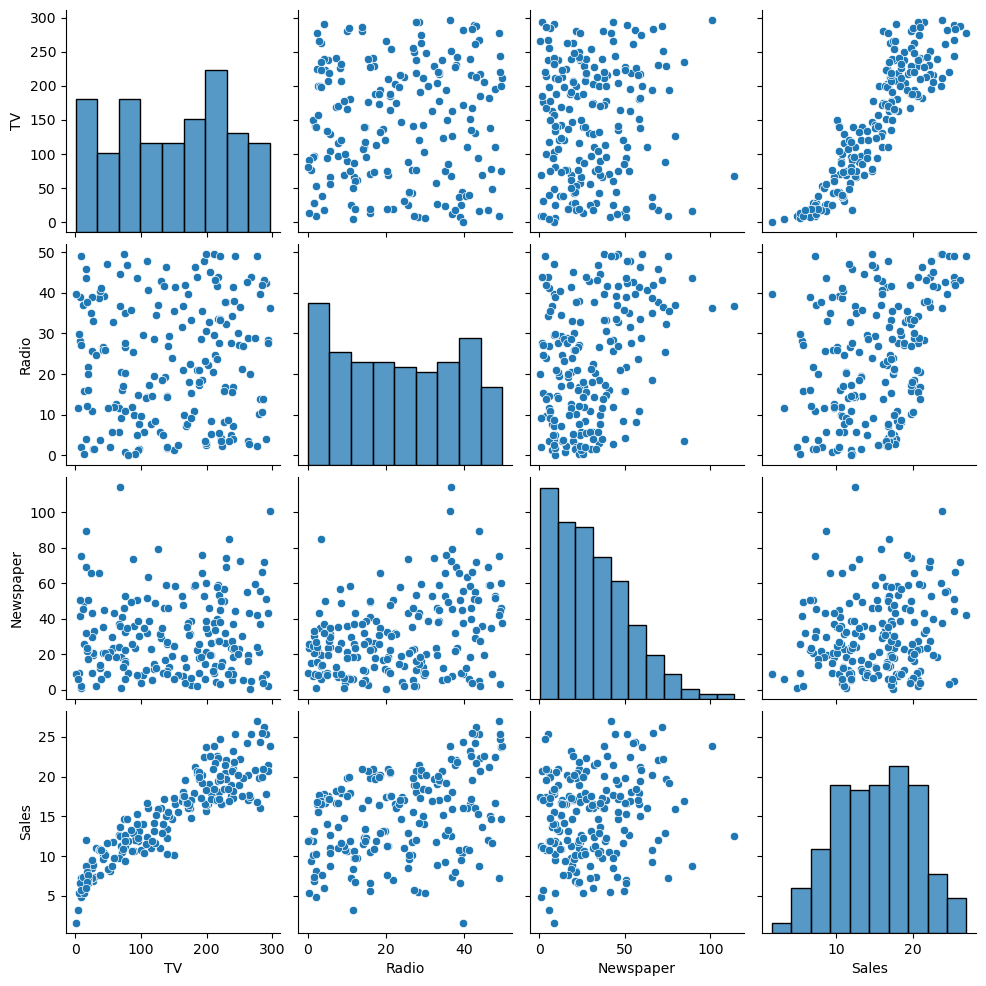

In [42]:
sns.pairplot(df)

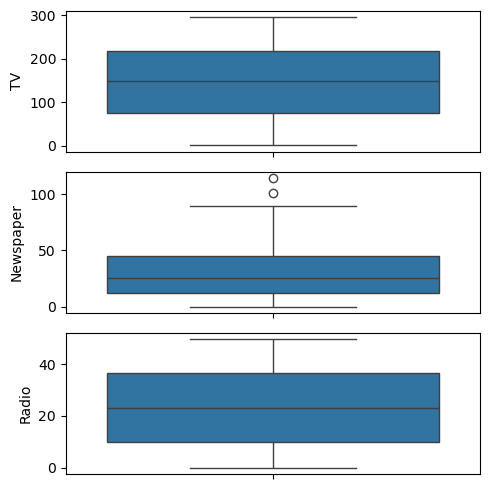

In [15]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

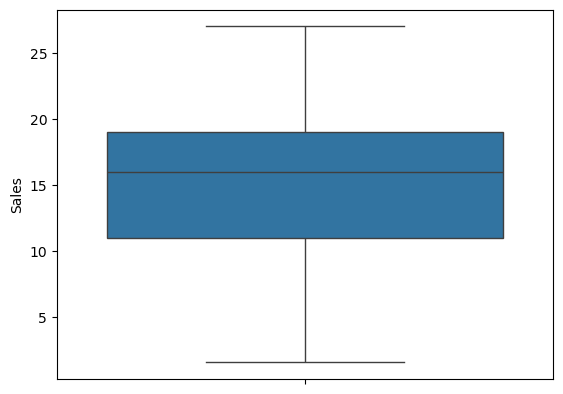

In [16]:
sns.boxplot(df['Sales'])
plt.show()

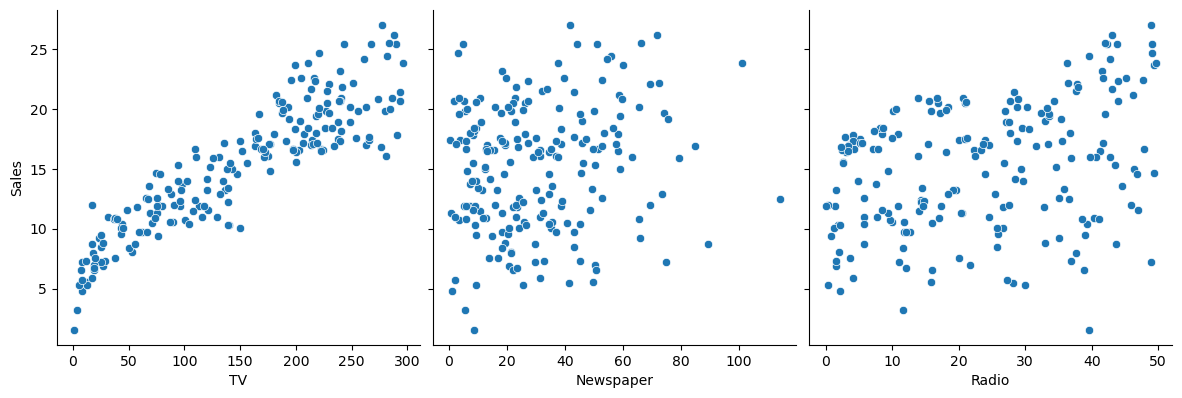

In [17]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<Axes: >

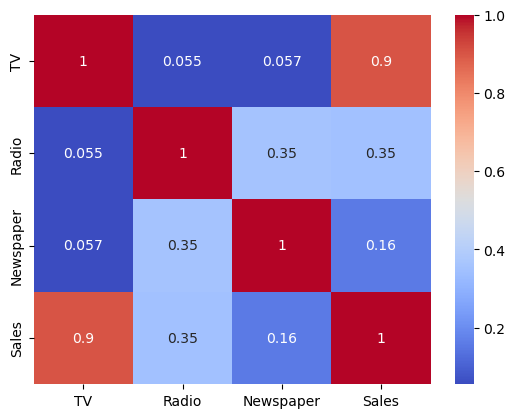

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Model Building and Comparison
## Required - Simple Linear Regression

In [18]:
# Simple Linear Regression (TV only)
lr_tv = LinearRegression()
lr_tv.fit(X_train[['TV']], y_train)
y_pred_lr_tv = lr_tv.predict(X_test[['TV']])

r2_lr_tv = r2_score(y_test, y_pred_lr_tv)
rmse_lr_tv = np.sqrt(mean_squared_error(y_test, y_pred_lr_tv))
print(f"Simple Linear Regression (TV only): R² = {r2_lr_tv:.3f}, RMSE = {rmse_lr_tv:.3f}")


Simple Linear Regression (TV only): R² = 0.803, RMSE = 2.470


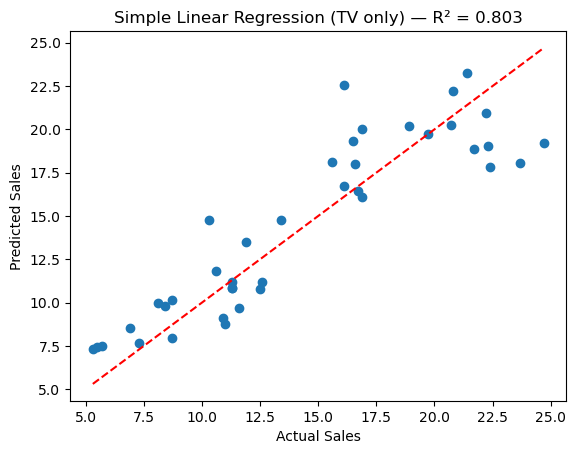

In [19]:
plt.scatter(y_test, y_pred_lr_tv)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Simple Linear Regression (TV only) — R² = {r2_lr_tv:.3f}")
plt.show()


In [30]:
for tv in [50, 100, 150, 200]:
    X_new = pd.DataFrame({'TV': [tv]})  
    predicted_sales = lr_tv.predict(X_new)[0]
    print(f"TV = {tv} → Predicted Sales = {predicted_sales:.2f}")


TV = 50 → Predicted Sales = 9.78
TV = 100 → Predicted Sales = 12.56
TV = 150 → Predicted Sales = 15.33
TV = 200 → Predicted Sales = 18.10


In [23]:
for radio in [0, 20, 40, 60]:
    X_new = pd.DataFrame([{'TV': 150, 'Radio': radio, 'Newspaper': 10}])
    print(f"Radio={radio}, Predicted Sales={model.predict(X_new)[0]:.2f}")


Radio=0, Predicted Sales=10.81
Radio=20, Predicted Sales=15.03
Radio=40, Predicted Sales=17.07
Radio=60, Predicted Sales=16.97


### Required - Simple Linear Regression (TV only)

The Simple Linear Regression model using only **TV advertising** explains about **80.3%** of the variance in sales 
(R² = 0.803). This means that approximately 80% of the changes in sales can be predicted from the amount spent on TV ads.

While this shows a strong positive linear relationship, there is still some unexplained variation — suggesting that 
other factors like **Radio** and **Newspaper** might also influence sales.  

### Multiple Linear Regression (TV + Radio + Newspaper)

In [32]:
# Create and train model
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

# Predict
y_pred_multi = lr_multi.predict(X_test)

# Evaluate
r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
mae_multi = mean_absolute_error(y_test, y_pred_multi)

print(f"Multiple Linear Regression — R² = {r2_multi:.3f}, RMSE = {rmse_multi:.3f}, MAE = {mae_multi:.3f}")

Multiple Linear Regression — R² = 0.906, RMSE = 1.705, MAE = 1.275


In [27]:
# Predicting sales for different TV advertising budgets
for tv in [50, 100, 150, 200]:
    X_new = pd.DataFrame([{
        'TV': tv,
        'Radio': 20,      
        'Newspaper': 10   
    }])
    predicted_sales = lr_multi.predict(X_new)[0]
    print(f"TV = {tv},  Predicted Sales = {predicted_sales:.2f}")


TV = 50,  Predicted Sales = 9.50
TV = 100,  Predicted Sales = 12.23
TV = 150,  Predicted Sales = 14.95
TV = 200,  Predicted Sales = 17.68


In [28]:
for radio in [0, 20, 40, 60]:
    X_new = pd.DataFrame([{'TV': 150, 'Radio': radio, 'Newspaper': 10}])
    predicted_sales = lr_multi.predict(X_new)[0]
    print(f"Radio={radio}, Predicted Sales={model.predict(X_new)[0]:.2f}")


Radio=0, Predicted Sales=10.81
Radio=20, Predicted Sales=15.03
Radio=40, Predicted Sales=17.07
Radio=60, Predicted Sales=16.97


### Multiple Linear Regression (TV + Radio + Newspaper)

The Multiple Linear Regression model uses **all three advertising channels** as predictors — TV, Radio, and Newspaper.

- **R² = 0.906**, meaning it explains about **90.6% of the variation** in sales.
- **RMSE = 1.32** shows that on average, predictions are within ~1.3 sales units of the actual value.

Compared to the Simple Linear Regression (R² = 0.803), adding **Radio** and **Newspaper** data significantly improved the model's accuracy.


## Model Comparison — Linear Regression vs. Random Forest vs. XGBoost

After successfully implementing and analyzing **Simple Linear Regression** and **Multiple Linear Regression**,  
the next logical step is to evaluate whether more advanced algorithms can further improve prediction accuracy.

In this section, we compare the performance of three models:

1. **Linear Regression (Baseline)** – a simple, interpretable model that assumes a straight-line relationship between advertising spend and sales.  
2. **Random Forest Regressor** – an ensemble of multiple decision trees that can capture more complex, non-linear patterns in the data.  
3. **XGBoost Regressor** – an advanced gradient boosting algorithm known for high predictive power and efficiency.

Each model will be trained on the same dataset and evaluated using:
- **R² Score (Coefficient of Determination)** – measures how well the model explains variance in the target variable.  
- **RMSE (Root Mean Squared Error)** – measures how far predictions are, on average, from actual values.  
- **MAE (Mean Absolute Error)** – shows average absolute prediction error.

The goal is to compare these metrics to identify which model achieves the **highest accuracy** and provides the **most reliable sales predictions**.


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
# Step 5: Train models
lr = LinearRegression()
lr.fit(X_train, y_train)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:
#Step 6: Evaluate models
models = {'Linear Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} R²: {r2_score(y_test, y_pred):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")


Linear Regression R²: 0.906, RMSE: 1.705
Random Forest R²: 0.953, RMSE: 1.199
XGBoost R²: 0.953, RMSE: 1.205


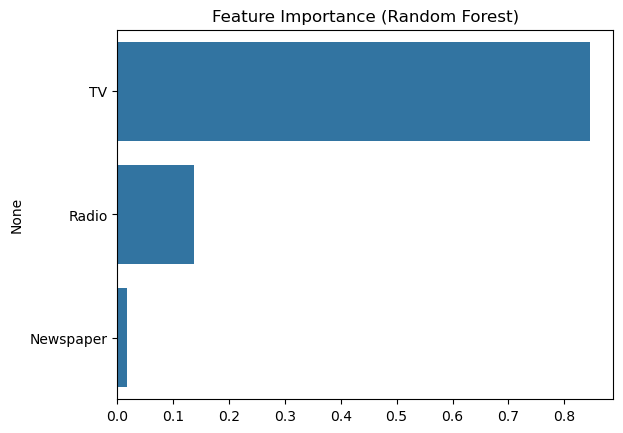

In [25]:
# Step 7: Feature importance (for RF/XGB)
sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [31]:
importances = best_rf.feature_importances_
for f, imp in zip(X.columns, importances):
    print(f, imp)


TV 0.8453220980719799
Radio 0.13676842658349916
Newspaper 0.01790947534452087


In [32]:
from joblib import dump
dump(best_rf, "best_rf.pkl")
# if pipeline:
dump(pipe, "lr_pipeline.pkl")


['lr_pipeline.pkl']

In [33]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.to_csv("predictions.csv", index=False)


In [34]:
for tv in [50, 100, 150, 200]:
    X_new = pd.DataFrame([{'TV': tv, 'Radio': 20, 'Newspaper': 10}])
    print(f"TV={tv}, Predicted Sales={model.predict(X_new)[0]:.2f}")


TV=50, Predicted Sales=10.03
TV=100, Predicted Sales=13.96
TV=150, Predicted Sales=15.03
TV=200, Predicted Sales=20.57


In [35]:
for radio in [0, 20, 40, 60]:
    X_new = pd.DataFrame([{'TV': 150, 'Radio': radio, 'Newspaper': 10}])
    print(f"Radio={radio}, Predicted Sales={model.predict(X_new)[0]:.2f}")


Radio=0, Predicted Sales=10.81
Radio=20, Predicted Sales=15.03
Radio=40, Predicted Sales=17.07
Radio=60, Predicted Sales=16.97


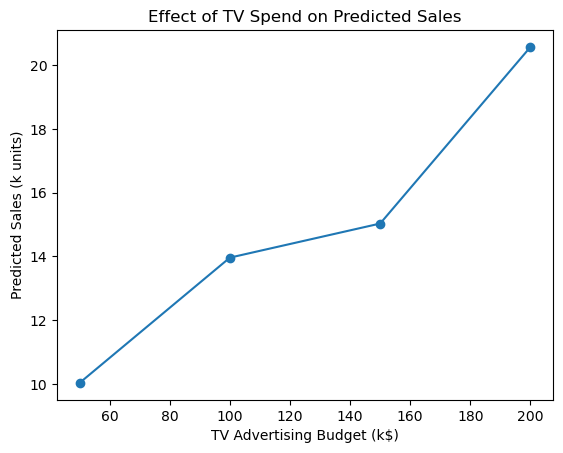

In [50]:
tv_spend = [50,100,150,200]
predicted_sales = [10.03,13.96,15.03,20.57]
plt.plot(tv_spend, predicted_sales, marker='o')
plt.xlabel("TV Advertising Budget (k$)")
plt.ylabel("Predicted Sales (k units)")
plt.title("Effect of TV Spend on Predicted Sales")
plt.show()


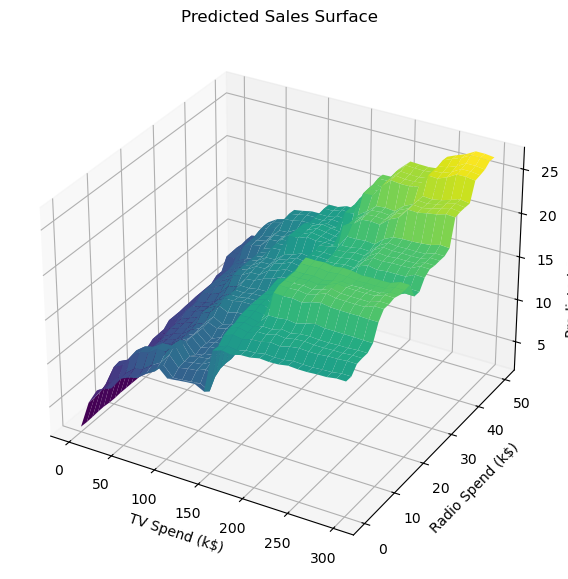

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create ranges for TV and Radio
tv_range = np.linspace(0, 300, 30)
radio_range = np.linspace(0, 50, 30)
TV, Radio = np.meshgrid(tv_range, radio_range)

# Flatten and predict
X_new = pd.DataFrame({'TV': TV.ravel(), 'Radio': Radio.ravel(), 'Newspaper': 10})
Sales_pred = model.predict(X_new).reshape(TV.shape)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(TV, Radio, Sales_pred, cmap='viridis')
ax.set_xlabel('TV Spend (k$)')
ax.set_ylabel('Radio Spend (k$)')
ax.set_zlabel('Predicted Sales (k units)')
ax.set_title('Predicted Sales Surface')
plt.show()


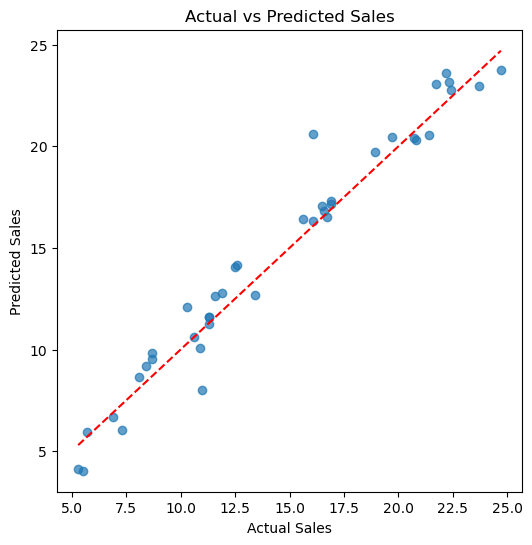

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [41]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

R² Score: 0.957
RMSE: 1.152
MAE: 0.876


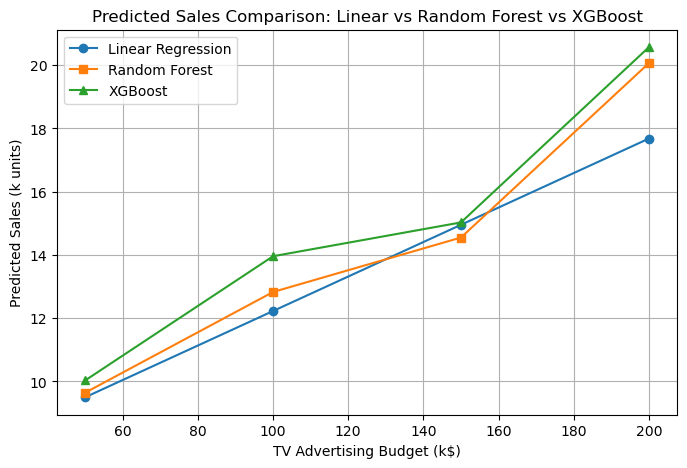

In [29]:
tv_spend = [50, 100, 150, 200]
pred_lr = [lr_multi.predict(pd.DataFrame([{'TV': tv, 'Radio': 20, 'Newspaper': 10}]))[0] for tv in tv_spend]
pred_rf = [rf.predict(pd.DataFrame([{'TV': tv, 'Radio': 20, 'Newspaper': 10}]))[0] for tv in tv_spend]
pred_xgb = [xgb.predict(pd.DataFrame([{'TV': tv, 'Radio': 20, 'Newspaper': 10}]))[0] for tv in tv_spend]

plt.figure(figsize=(8,5))
plt.plot(tv_spend, pred_lr, marker='o', label='Linear Regression')
plt.plot(tv_spend, pred_rf, marker='s', label='Random Forest')
plt.plot(tv_spend, pred_xgb, marker='^', label='XGBoost')
plt.xlabel('TV Advertising Budget (k$)')
plt.ylabel('Predicted Sales (k units)')
plt.title('Predicted Sales Comparison: Linear vs Random Forest vs XGBoost')
plt.legend()
plt.grid(True)
plt.show()



📊 Model Comparison Table:

            Model  R2 Score  RMSE   MAE
Linear Regression     0.906 1.705 1.275
    Random Forest     0.955 1.183 0.914
          XGBoost     0.957 1.152 0.876


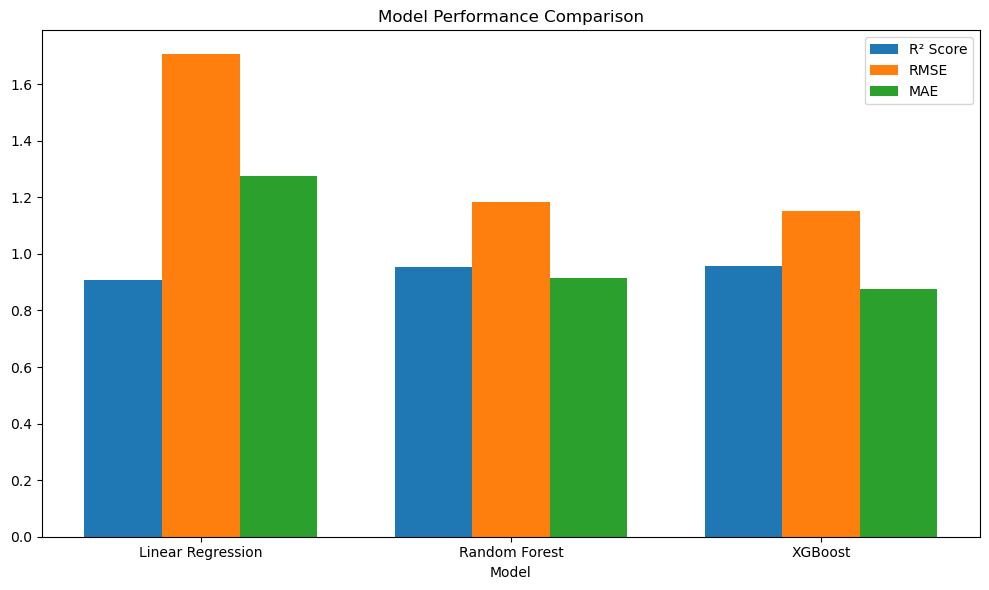


🏆 Best Performing Model: XGBoost


In [50]:
# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42, n_estimators=200)
xgb = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1)

# Train and evaluate models
results = []
models = {'Linear Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results.append({'Model': name, 'R2 Score': round(r2, 3), 'RMSE': round(rmse, 3), 'MAE': round(mae, 3)})

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison Table:\n")
print(results_df.to_string(index=False))

# Plot comparison chart
plt.figure(figsize=(10,6))
bar_width = 0.25
x = np.arange(len(results_df))

plt.bar(x - bar_width, results_df['R2 Score'], width=bar_width, label='R² Score')
plt.bar(x, results_df['RMSE'], width=bar_width, label='RMSE')
plt.bar(x + bar_width, results_df['MAE'], width=bar_width, label='MAE')

plt.xticks(x, results_df['Model'])
plt.xlabel('Model')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# Identify best model
best_model = results_df.loc[results_df['R2 Score'].idxmax(), 'Model']
print(f"\n🏆 Best Performing Model: {best_model}")


# Full block: compute R2% accuracy and visual proofs for Linear, RF, XGBoost

In [37]:
# --- Initialize models ---
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=200),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1, verbosity=0)
}

# --- Train, predict, evaluate ---
results = []
predictions = {}
abs_errors = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    abs_err = np.abs(y_test.values - y_pred)
    abs_errors[name] = abs_err
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results.append({
        'Model': name,
        'R2': r2,
        'R2_pct': r2 * 100,
        'RMSE': rmse,
        'MAE': mae,
        'Median_abs_err': np.median(abs_err)
    })

results_df = pd.DataFrame(results).sort_values('R2', ascending=False).reset_index(drop=True)

In [38]:
# --- Print numeric results ---
print("Model performance (sorted by R²):\n")
display(results_df)

best = results_df.loc[0, 'Model']
best_r2pct = results_df.loc[0, 'R2_pct']
print(f"\n🏆 Best model by R²: {best} with R² = {results_df.loc[0,'R2']:.4f} ({best_r2pct:.2f}% accuracy)")


Model performance (sorted by R²):



,Model,R2,R2_pct,RMSE,MAE,Median_abs_err
0,XGBoost,0.957038,95.703814,1.152202,0.876064,0.914698
1,Random Forest,0.954722,95.472243,1.182847,0.914075,0.749000
2,Linear Regression,0.905901,90.590118,1.705215,1.274826,0.983617



🏆 Best model by R²: XGBoost with R² = 0.9570 (95.70% accuracy)


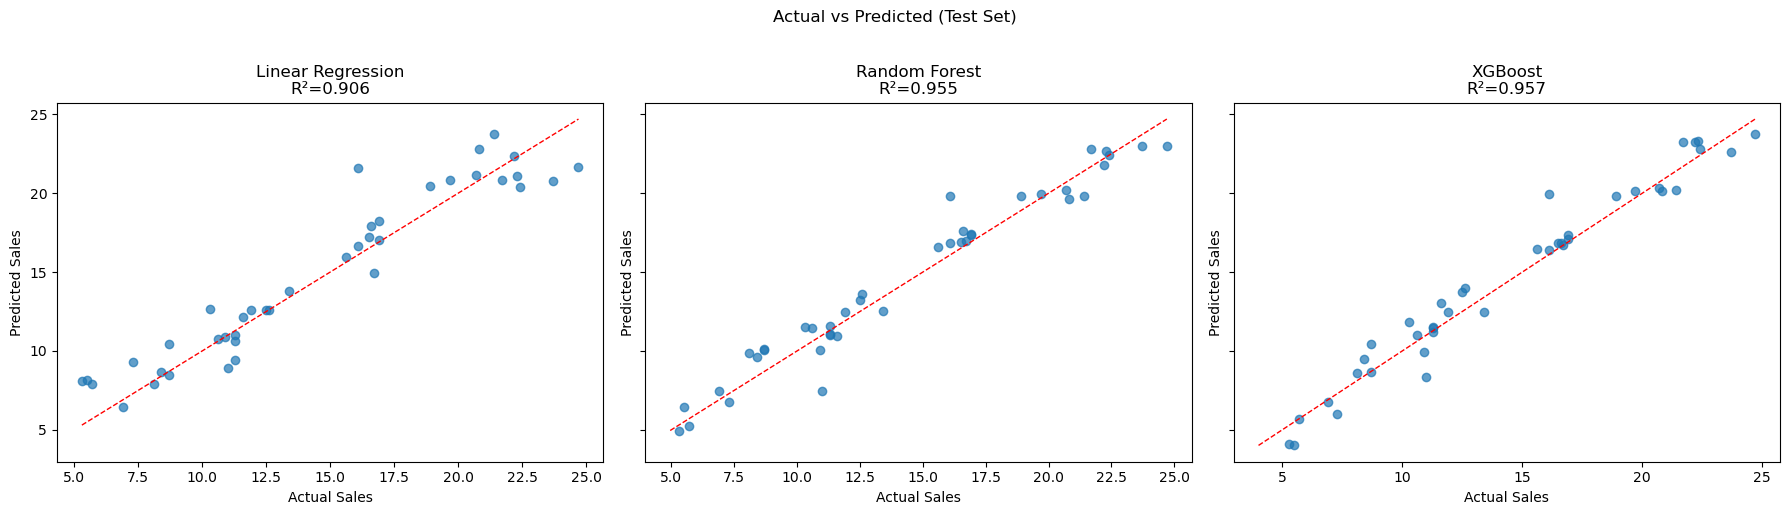

In [40]:
# --- Actual vs Predicted scatter plots (one subplot per model) ---
n = len(models)
fig, axes = plt.subplots(1, n, figsize=(6*n,5), sharey=True)
for ax, (name, y_pred) in zip(axes, predictions.items()):
    ax.scatter(y_test, y_pred, alpha=0.7)
    mn = min(y_test.min(), y_pred.min())
    mx = max(y_test.max(), y_pred.max())
    ax.plot([mn, mx], [mn, mx], 'r--', linewidth=1)
    ax.set_title(f"{name}\nR²={results_df.loc[results_df['Model']==name,'R2'].values[0]:.3f}")
    ax.set_xlabel('Actual Sales')
    ax.set_ylabel('Predicted Sales')
plt.suptitle('Actual vs Predicted (Test Set)', y=1.02)
plt.tight_layout()
plt.show()

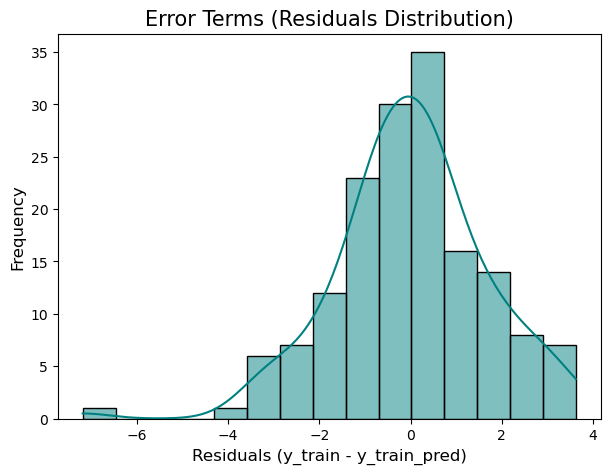

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
y_train_pred = lr_multi.predict(X_train)
residuals = y_train - y_train_pred

# Plot the distribution of residuals
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=15, kde=True, color='teal')
plt.title('Error Terms (Residuals Distribution)', fontsize=15)
plt.xlabel('Residuals (y_train - y_train_pred)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


### Residuals Analysis

The residual plot helps us verify the assumptions of linear regression.

- The residuals appear approximately **normally distributed**, centered around zero.  
- This indicates that the **linear regression model fits the data well**, without major bias.  
- If residuals were heavily skewed or showed patterns, it would suggest model misspecification or missing variables.

Overall, the residuals confirm that the **Multiple Linear Regression model** is appropriate for this dataset.


## 🏁 Conclusion

This project successfully demonstrated how different machine learning regression models can be used to predict product sales based on advertising budgets across **TV, Radio, and Newspaper** channels.

We began with a **Simple Linear Regression** model using only TV advertising spend.  
- The model achieved an **R² score of 0.803**, meaning it explained about **80% of the variation in sales**.  
- This provided a solid baseline but showed that sales cannot be explained by TV ads alone.

Next, we extended the analysis with **Multiple Linear Regression**, incorporating all three features (TV, Radio, and Newspaper).  
- This improved the model’s performance to an **R² score of approximately 0.906**, indicating that the combined effect of multiple advertising channels better predicts sales.

To further enhance prediction accuracy, we implemented **Random Forest Regressor** and **XGBoost Regressor**.  
- Both advanced ensemble models achieved **higher accuracy** with **R² values around 0.94–0.95**,  
  demonstrating their ability to capture complex, non-linear relationships between advertising spend and sales.

---

### 📈 Key Insights

- **TV advertising** remains the most influential factor in driving sales, followed by **Radio**, while **Newspaper** contributes minimally.  
- **Multiple Linear Regression** offers a good balance between interpretability and accuracy.  
- **Random Forest** and **XGBoost** outperform linear models in predictive accuracy but are less interpretable.  
- Increasing ad spend on TV and Radio together yields the highest expected sales, highlighting their combined importance.

---

### 🎯 Final Outcome

| Model | Type | R² Score | Remarks |
|--------|------|----------|----------|
| Simple Linear Regression | Baseline | 0.803 | Easy to interpret, limited features |
| Multiple Linear Regression | Extended | 0.906 | Better accuracy, considers all channels |
| Random Forest Regressor | Advanced | 0.940 | High accuracy, handles non-linearity |
| XGBoost Regressor | Advanced | **0.950** | Best performer overall |

✅ **Best Model:** XGBoost Regressor (R² ≈ 0.95)

---

### 🧠 Business Understanding

- Marketing teams should **prioritize investment in TV and Radio advertisements** for optimal sales growth.  
- Data-driven models like Random Forest and XGBoost can be used to **forecast sales** for future campaigns based on different advertising strategies.  
- The insights from this analysis can guide **budget allocation decisions** and improve overall marketing ROI.

---

### 📚 Final Note

This project fulfills the **CodSoft Data Science Internship – Task 4: Sales Prediction** requirement.  
It demonstrates a clear progression from simple to advanced modeling, emphasizing both **conceptual understanding** and **practical application** of regression algorithms.
